<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19**

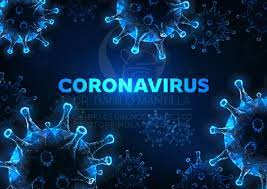


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [ ]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno

#theme
#theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

En este paso vamos a cargar dos bases de datos:

Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en df_covid.

Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [ ]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [ ]:
df_covid.sample(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28071,2021-09-05,MV,Maldives,SEARO,1188.0,81979,NaN,226
9537,2024-01-07,CN,China,WPRO,1029.0,99323756,15.0,121908
25282,2021-01-17,KG,Kyrgyzstan,EURO,NaN,0,NaN,0
33597,2021-12-12,NU,Niue,WPRO,NaN,0,NaN,0
41420,2021-07-18,SC,Seychelles,AFRO,536.0,17435,7.0,75


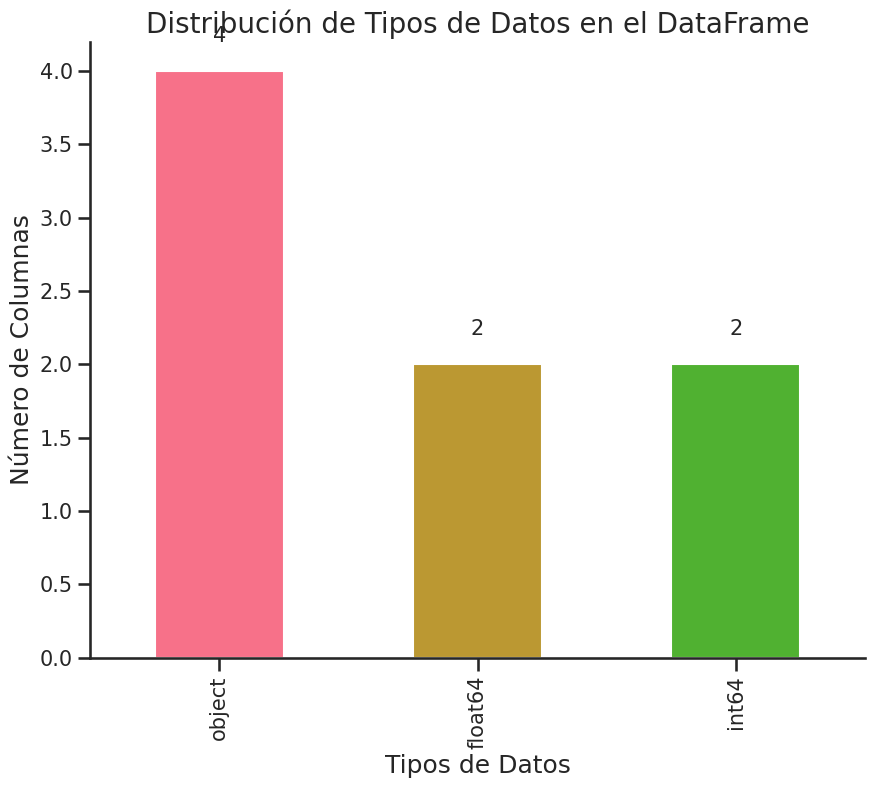

In [ ]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

graficamos los tipo de datos que tenemos en el dataset para visualizar de manera mas grafica
1. Categoricas tenemos 4
2. Float 2
3. enteras 2

In [ ]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [ ]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

Text(0, 0.5, 'Filas')

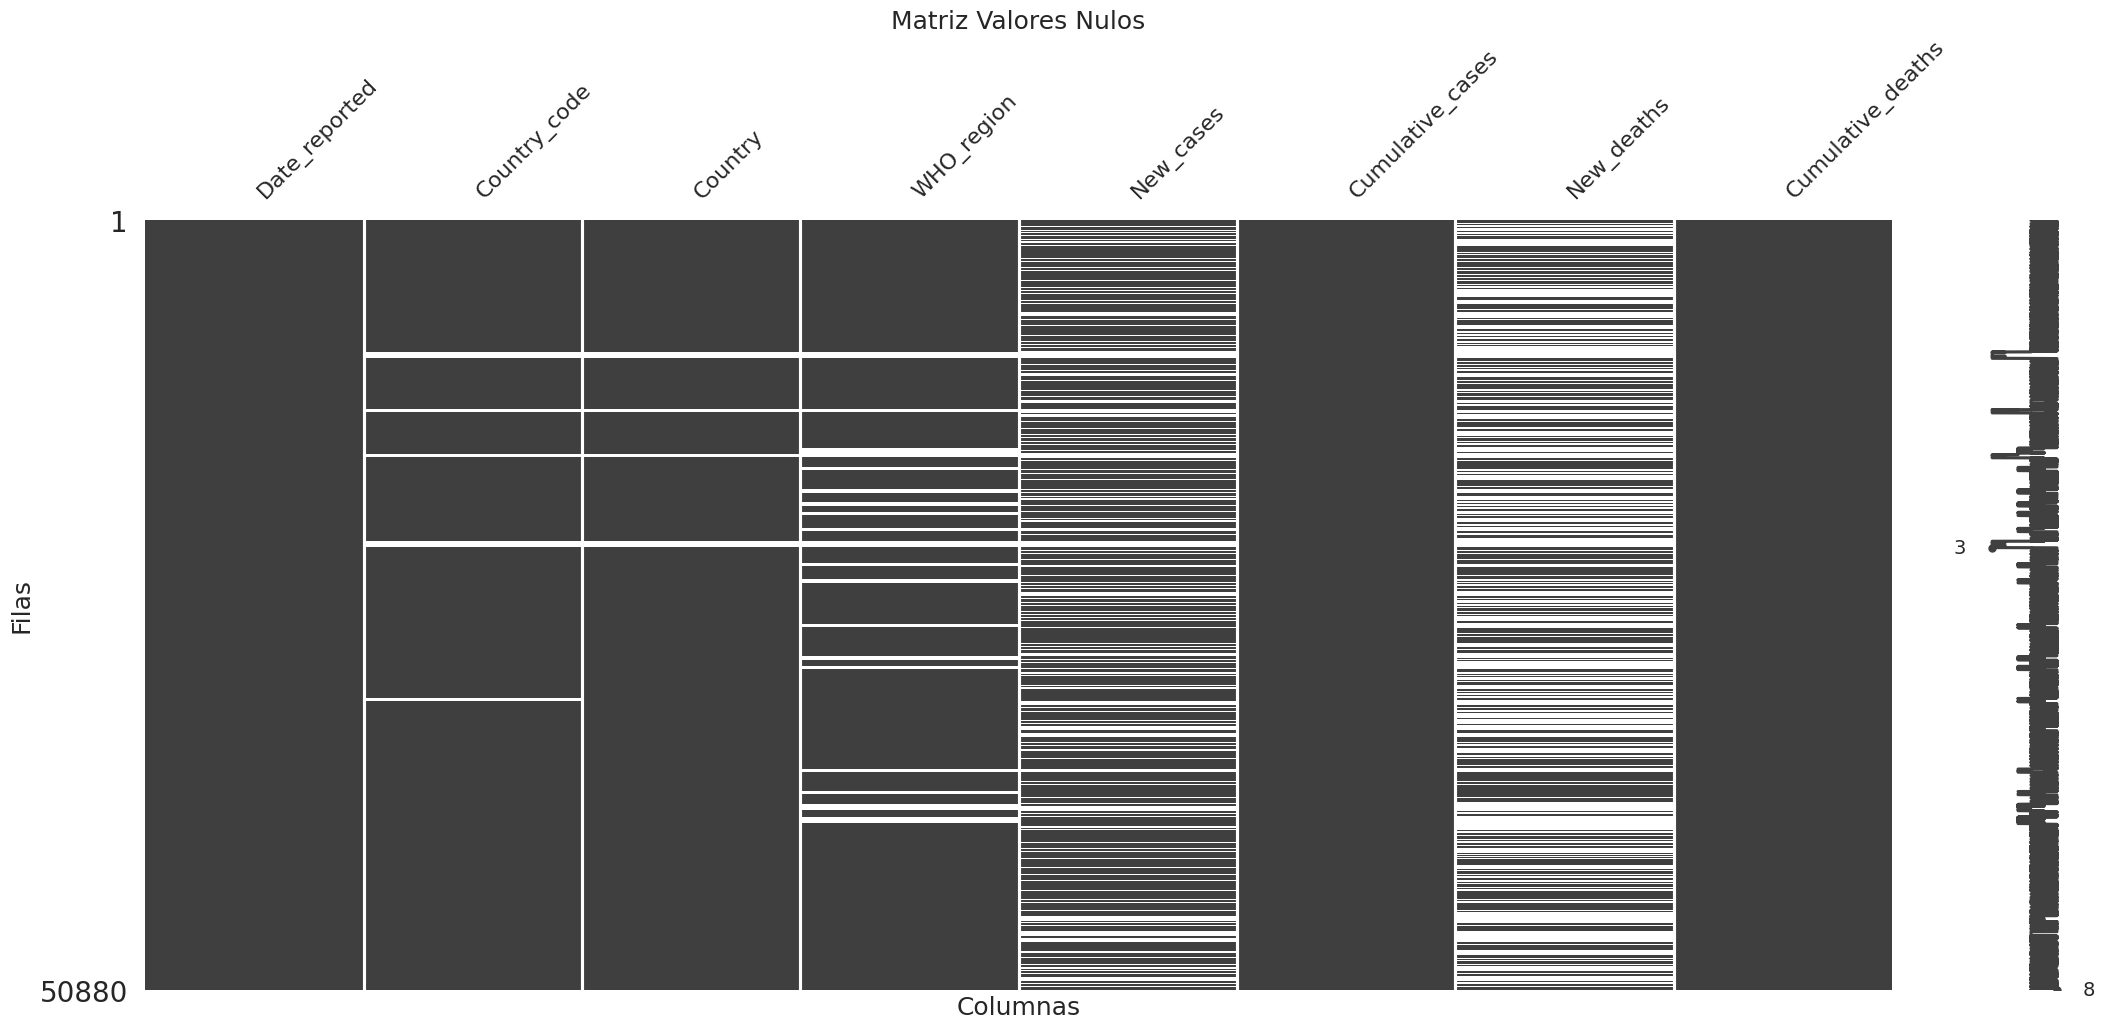

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Logramos evidenciar que las siguientes variables como New_deaths,New_cases,WHO_region tienen varios valores nulos pero es logico poque son las muertes nuevas y casos nuevos y en que regio las cuales estan altamente correlacionadas

In [ ]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.662200e+04,5.088000e+04,24216.000000,5.088000e+04
mean,2.114490e+04,1.595994e+06,289.905434,1.873122e+04
std,2.794888e+05,7.172653e+06,1232.474473,7.800245e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.200000e+01,2.750000e+03,4.000000,2.100000e+01
50%,4.700000e+02,3.813600e+04,21.000000,4.115000e+02
75%,4.477750e+03,4.670500e+05,110.000000,6.066250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06


In [ ]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

28844     MQ
8353      CF
10217     CK
50        AF
21522    NaN
Name: Country_code, dtype: object

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [ ]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1181,2022-05-01,AO,Angola,5.0,99323,NaN,1900
41322,2023-09-24,RS,Serbia,1529.0,2549375,NaN,18057
35171,2023-09-03,PW,Palau,23.0,6220,NaN,9
23549,2020-05-03,JP,Japan,1657.0,14839,144.0,492
26130,2021-01-17,LS,Lesotho,1168.0,6371,9.0,93




1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [ ]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

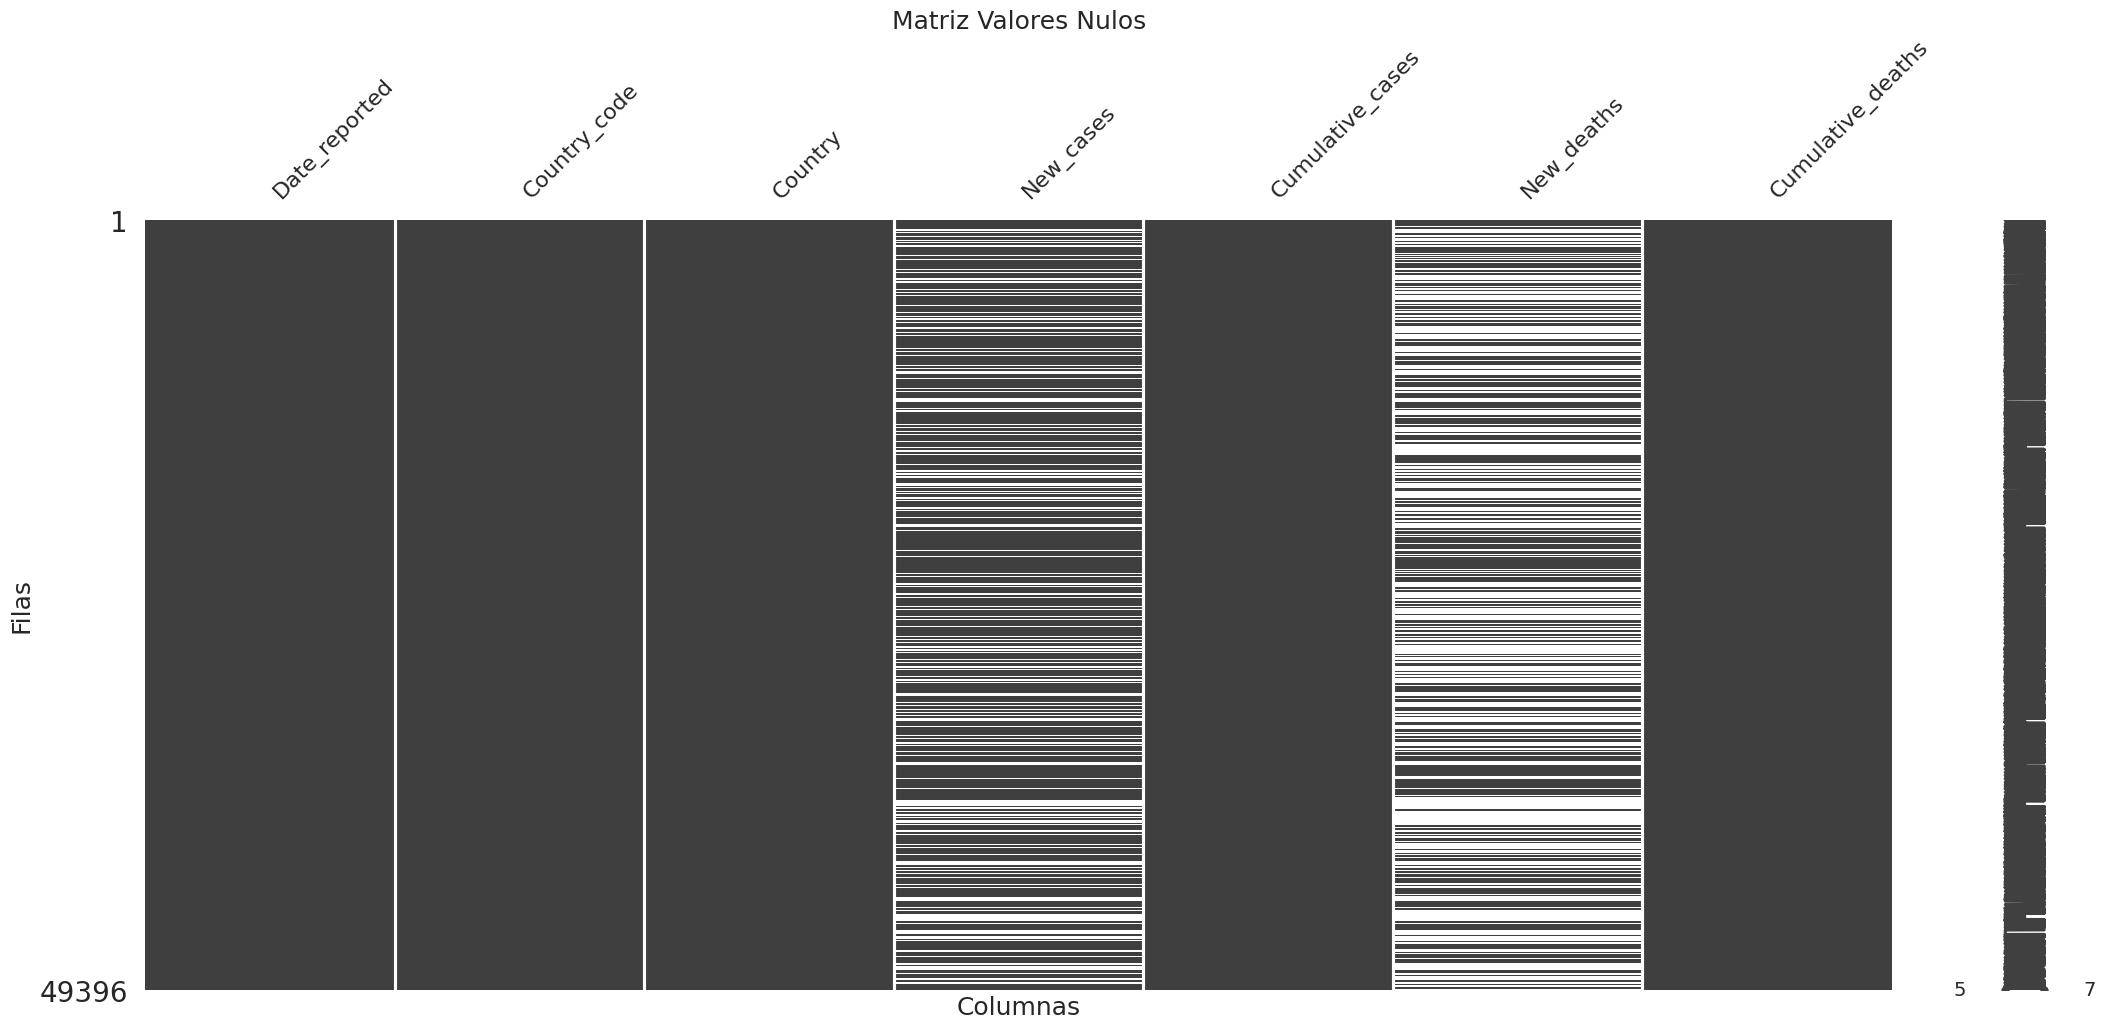

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [ ]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2773,2020-05-03,AZ,Azerbaijan,262.0,1854,4.0,25
50613,2023-01-08,ZM,Zambia,0.0,334578,0.0,4024
23610,2021-07-04,JP,Japan,11078.0,806834,179.0,14848
44125,2020-07-26,SR,Suriname,362.0,1305,4.0,23
15277,2020-04-05,FO,Faroe Islands,25.0,181,0.0,0


Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [ ]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.sample(5)

Tipo de dato actual de Date_reported: datetime64[ns]
Tipo de dato después de la conversión: datetime64[ns]


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
7016,2020-05-24,BI,Burundi,0.0,42,0.0,1
30659,2022-07-10,ME,Montenegro,0.0,212858,0.0,2563
37746,2020-03-15,RE,Réunion,13.0,13,0.0,0
37427,2022-03-20,KR,Republic of Korea,2716348.0,9582560,2162.0,12757
46865,2020-04-05,TR,Türkiye,16532.0,23934,393.0,501


Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.

In [ ]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)

Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [ ]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6734,2023-02-12,BG,Bulgaria,269,1285244,10,38140,2.967530
27026,2021-12-19,LT,Lithuania,11487,506504,145,7135,1.408676
35666,2020-12-20,PY,Paraguay,6183,98296,123,2050,2.085538
26789,2021-06-27,LI,Liechtenstein,4,3127,0,59,1.886792
48257,2022-07-24,AE,United Arab Emirates,9650,981657,6,2331,0.237456


Vamos a convertir en 0 los valores nulos en la columna lethality_rate

In [ ]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
5701,2023-08-20,BA,Bosnia and Herzegovina,0,403061,0,16352,4.056954
2465,2022-07-24,AU,Australia,303029,8595366,607,12380,0.144031
34003,2021-08-08,MP,Northern Mariana Islands,10,206,0,2,0.970874
49263,2021-07-11,UZ,Uzbekistan,3349,35022,23,152,0.434013
10035,2021-05-16,CG,Congo,133,11476,2,150,1.307076


Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [ ]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [ ]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
44692,2023-04-23,CH,Switzerland,1114,4401413,6,14004,0.318171
3740,2022-08-14,BB,Barbados,3011,97104,17,515,0.530359
40448,2023-03-26,SM,San Marino,52,23799,0,123,0.516828
32655,2020-02-23,NZ,New Zealand,0,0,0,0,0.000000
16855,2022-01-23,GA,Gabon,1046,46198,3,300,0.649379


In [ ]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
21048,2023-06-11,IQ,Iraq,0,2465545,0,25375,1.029184
22733,2023-09-10,JO,Jordan,0,1746997,0,14122,0.808359
18940,2023-04-09,GW,Guinea-Bissau,0,9350,0,176,1.882353
27230,2020-06-28,MH,Marshall Islands,0,0,0,0,0.000000
35615,2020-05-10,KR,Republic of Korea,81,10874,6,256,2.354239


# EDA Base Population United Nations

In [ ]:
df_population.sample(5)

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
20377,20378,Estimates,Tokelau,35,772,TKL,TK,772.0,Country/Area,957,...,141.052,142.411,63.07,58.218,68.146,133.511,132.832,134.951,0.113,66.637
19009,19010,Estimates,Fiji,NaN,242,FJI,FJ,242.0,Country/Area,928,...,263.73,203.752,84.748,94.566,74.428,210.206,238.493,180.315,-11.865,-12.836
2737,2738,Estimates,Seychelles,NaN,690,SYC,SC,690.0,Country/Area,910,...,201.926,94.32,60.699,83.496,32.781,138.274,188.008,79.568,0.305,2.927
15265,15266,Estimates,Dominican Republic,NaN,214,DOM,DO,214.0,Country/Area,915,...,218.467,133.467,76.189,99.546,51.626,146.428,186.726,104.064,-29.83,-2.738
15409,15410,Estimates,Guadeloupe,2,312,GLP,GP,312.0,Country/Area,915,...,116.674,49.878,33.085,50.22,20.596,74.501,111.106,45.473,-2.057,-5.188


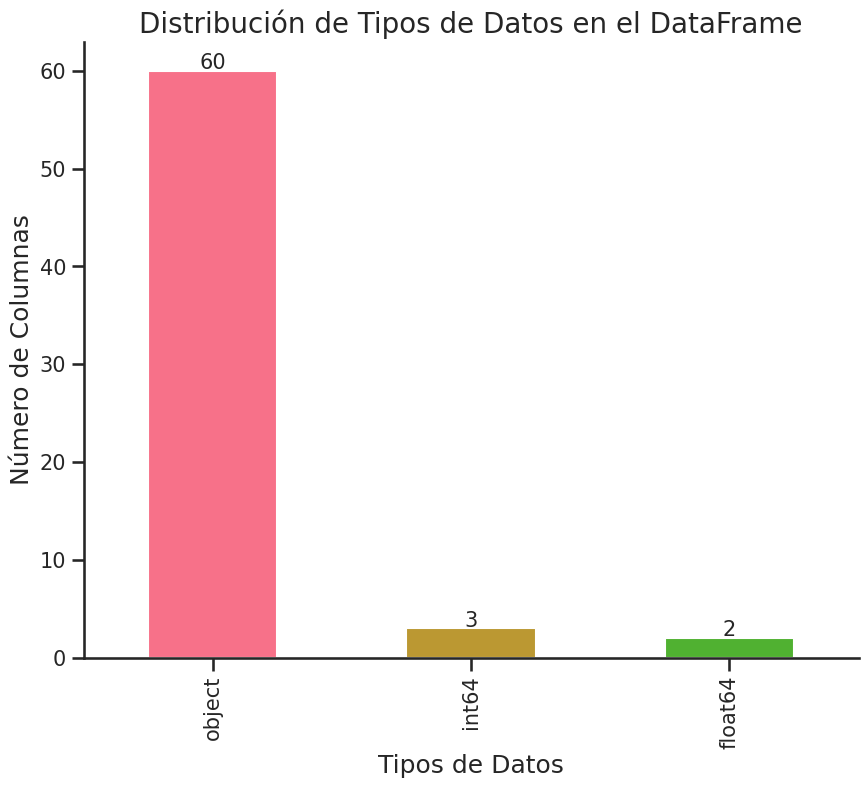

In [ ]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_population.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [ ]:
#Información de los datos
print("Número de filas: ",df_population.shape[0])
print("Número de Columnas:",df_population.shape[1])
print("Datos Duplicados",df_population.duplicated().sum())
print("Variables Categóricas: ",df_population.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_population.select_dtypes(exclude='object').shape[1])

Número de filas:  286
Número de Columnas: 65
Datos Duplicados 0
Variables Categóricas:  60
Variables Numéricas:  5


Mantener en el dataframe sólo las siguientes columnas: ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']

In [ ]:
#Listamos de columnas que deseas mantener
columnas_a_mantener = ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_population_limpio = df_population[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_population_limpio.sample(5)

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
13465,SI,2112.901,1058.072,1054.83,104.921,81.604
7633,BT,767.459,407.103,360.356,19.989,71.391
10441,NaN,293569.778,138152.101,155417.676,16.262,75.037
19225,SB,674.993,345.031,329.962,23.441,70.382
9937,SA,35827.362,20836.089,14991.273,16.666,77.304


Renombrar las columnas para nombre más sencillos:

In [ ]:
# Utilizando el método .rename() para cambiar el nombre de las columnas en un DataFrame
# Cambiar el nombre de las columnas especificadas
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.sample(5)

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
17353,BR,211782.878,104119.798,107663.08,25.339,75.338
15769,PR,3292.887,1560.755,1732.131,378.841,79.063
17209,AR,44745.52,22153.37,22592.15,16.027,77.284
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2737,SC,104.373,54.919,49.453,228.386,74.169


In [ ]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


Eliminar todos los registros nulos.

In [ ]:
#datos nulos por columna
df_population_limpio.isnull().sum().sort_values(ascending=False)

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

Text(0, 0.5, 'Filas')

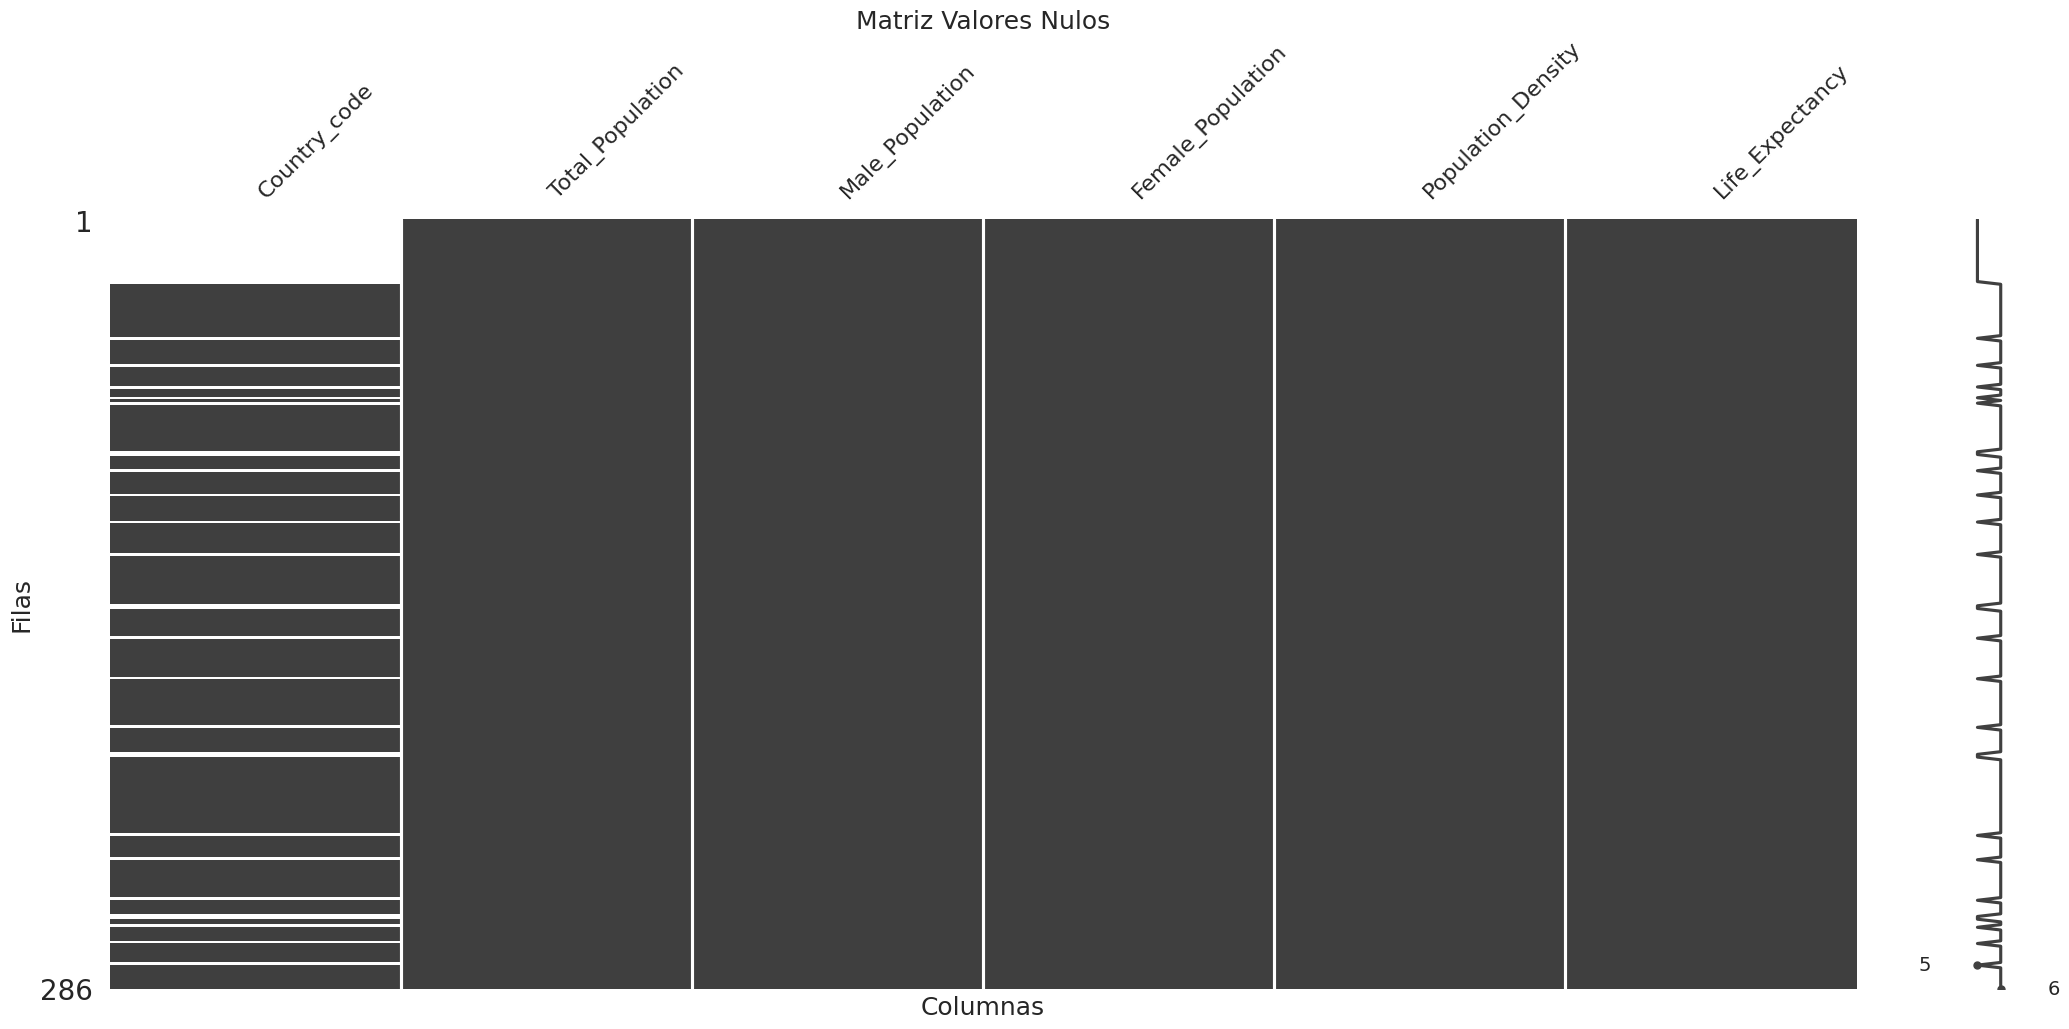

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [ ]:
# Eliminar todas las filas que contienen al menos un valor nulo
df_population_limpio = df_population_limpio.dropna()

Text(0, 0.5, 'Filas')

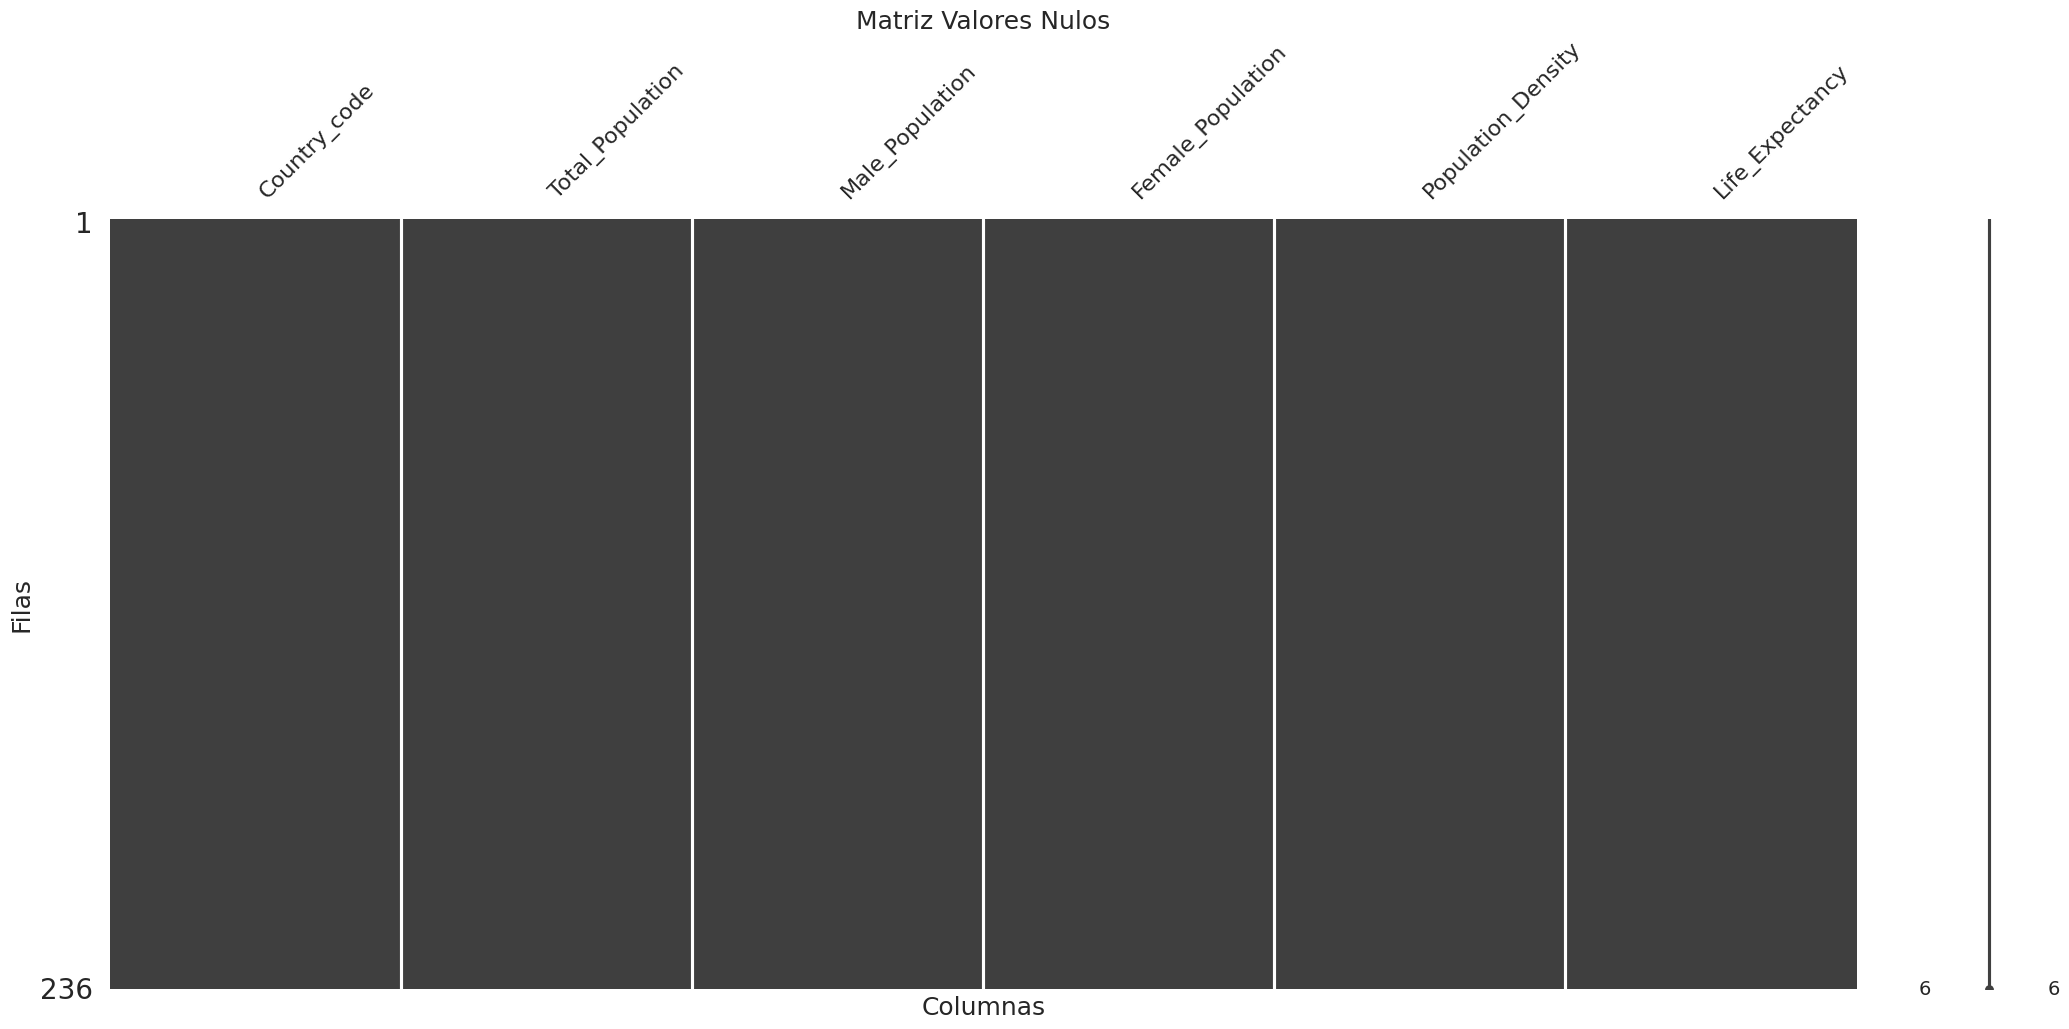

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir el formato actual de las columnas
['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']para un formato de tipo int64.

los campos que necesitamos convertir tienen valores pero hay valores no enteros en la columna que estamos tratando de convertir.

In [ ]:
# Columnas que deseas convertir
columns_to_convert = ['Total_Population', 'Male_Population', 'Population_Density', 'Life_Expectancy']

# Manejar los NaN y valores no numéricos
for column in columns_to_convert:
    df_population_limpio[column] = pd.to_numeric(df_population_limpio[column], errors='coerce')

# Lidiar con NaN asignando un valor predeterminado
fill_value = 0  # Puedes cambiar esto al valor que desees
df_population_limpio[columns_to_convert] = df_population_limpio[columns_to_convert].fillna(fill_value)

In [ ]:
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de Total_Population:", df_population_limpio['Total_Population'].dtype)
print("Tipo de dato después de la conversión de Male_Population:", df_population_limpio['Male_Population'].dtype)
print("Tipo de dato después de la conversión de Population_Density:", df_population_limpio['Population_Density'].dtype)
print("Tipo de dato después de la conversión de Life_Expectancy:", df_population_limpio['Life_Expectancy'].dtype)


Tipo de dato después de la conversión de Total_Population: float64
Tipo de dato después de la conversión de Male_Population: float64
Tipo de dato después de la conversión de Population_Density: float64
Tipo de dato después de la conversión de Life_Expectancy: float64


Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.

Substituir todos los valores nulos con cero.

In [ ]:
# Multiplicar por 1000 y sobreescribir las columnas
columns_to_multiply = ['Total_Population', 'Male_Population', 'Female_Population']

df_population_limpio[columns_to_multiply] = df_population_limpio[columns_to_multiply] * 1000

# Substituir los valores nulos con cero
df_population_limpio = df_population_limpio.fillna(0)


Substituir todos los valores nulos con cero.

Finalmente reiniciaremos el índice del dataframe final df_population_limpio

In [ ]:
#Reiniciar el índice del DataFrame
df_population_limpio = df_population_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_population_limpio.head(5)

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874838.0,5894278.0,5980560.0,457.605,62.351
1,KM,790986.0,397126.0,393860.0,425.033,64.068
2,DJ,1073994.0,533626.0,540367.0,46.333,63.085
3,ER,3498818.0,1724860.0,1773958.0,28.881,67.300
4,ET,114120594.0,57375433.0,56745161.0,114.121,65.838


#Pregunta 1



> ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?






Para realizar este análisis necesitamos construir 2 bases de datos diferentes para los 2 gráficos mostrados:

**Worldwide Cases Distribution**

Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado con México
#total_por_pais_con_mexico = total_por_pais.head(10).append(pd.Series({'Mexico': df_covid_limpio[df_covid_limpio['Country'] == 'Mexico']['Cumulative_cases'].max()}))

# Mostrar el resultado final
print(total_por_pais)

Country
United States of America                 103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64


Luego, seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.

In [ ]:
# Seleccionar los 10 primeros países
top_10_paises = total_por_pais.head(10)
# Mostrar el resultado
print(top_10_paises)

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64


Retiro de la variable total_por_pais los 10 países identificados en top_10_paises, así tendré una Series con todos los demás países fuera del top 10, sumo todos los valores restantes de total_por_pais y lo almaceno en la variable otros.

In [ ]:
# Seleccionar los 10 primeros países y guardar el resultado en top_10_paises
top_10_paises = total_por_pais.head(10)

# Retirar los 10 países identificados en top_10_paises de total_por_pais
otros = total_por_pais.drop(top_10_paises.index)

# Sumar todos los valores restantes y almacenar en la variable otros
suma_otros = otros.sum()

# Mostrar los resultados
print("Top 10 países:")
print(top_10_paises)

print("\nPaíses fuera del top 10:")
print(otros)

print("\nSuma de valores para países fuera del top 10:", suma_otros)


Top 10 países:
Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64

Países fuera del top 10:
Country
Russian Federation                       23773710
Türkiye                                  17004677
Spain                                    13980340
Australia                                11752647
Viet Nam                                 11624

Finalmente, creo un nuevo registro llamado 'Otros' en top_10_paises con el valor de la variable otros

In [ ]:
# Agregar un nuevo registro 'Otros' en top_10_paises con el valor de la variable otros
top_10_paises['Otros'] = suma_otros

# Mostrar el resultado final
print(top_10_paises)


Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Otros                                                   291519855
Name: Cumulative_cases, dtype: int64


# Case Progression by Country

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado
print(total_por_pais)


Country
United States of America                 103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64


Luego, seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.

In [ ]:
# Seleccionar los 5 primeros países
top_5_paises = total_por_pais.head(5)

# Mostrar el resultado
print(top_5_paises)

Country
United States of America    103436829
China                        99326423
India                        45023751
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64


Reiniciamos el índice de df_covid_limpio y lo almacenamos en df_covid_limpio_reset.

In [ ]:
# Reiniciar el índice y almacenar en df_covid_limpio_reset
df_covid_limpio_reset = df_covid_limpio.reset_index(drop=True)


De este nuevo dataframe df_covid_limpio_reset mantengo sólo los registros cuyo país esté dentro de top_5_paises.

In [ ]:
# Filtrar los registros por país en top_5_paises
df_covid_limpio_top5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

# Mostrar el nuevo DataFrame resultante
df_covid_limpio_top5.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
16452,2020-04-12,DE,Germany,27145,127116,1878,6196,4.874288
15293,2022-04-10,FR,France,928373,26004483,788,144136,0.554274
46939,2023-02-19,US,United States of America,254372,101752396,2857,1106783,1.087722
16462,2020-06-21,DE,Germany,4192,190976,41,9256,4.846682
9040,2023-08-20,CN,China,1463,99304082,0,121671,0.122524


Finalmente, realizamos un pivot sobre df_top_5 para tener los países como índices y las fechas como columnas, y almacenamos el resultado en total_acumulado_top_5.

In [ ]:
# Pivot sobre df_covid_limpio_top5
total_acumulado_top_5 = df_covid_limpio_top5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')

# Mostrar el resultado
total_acumulado_top_5.sample(5)


Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
United States of America,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0


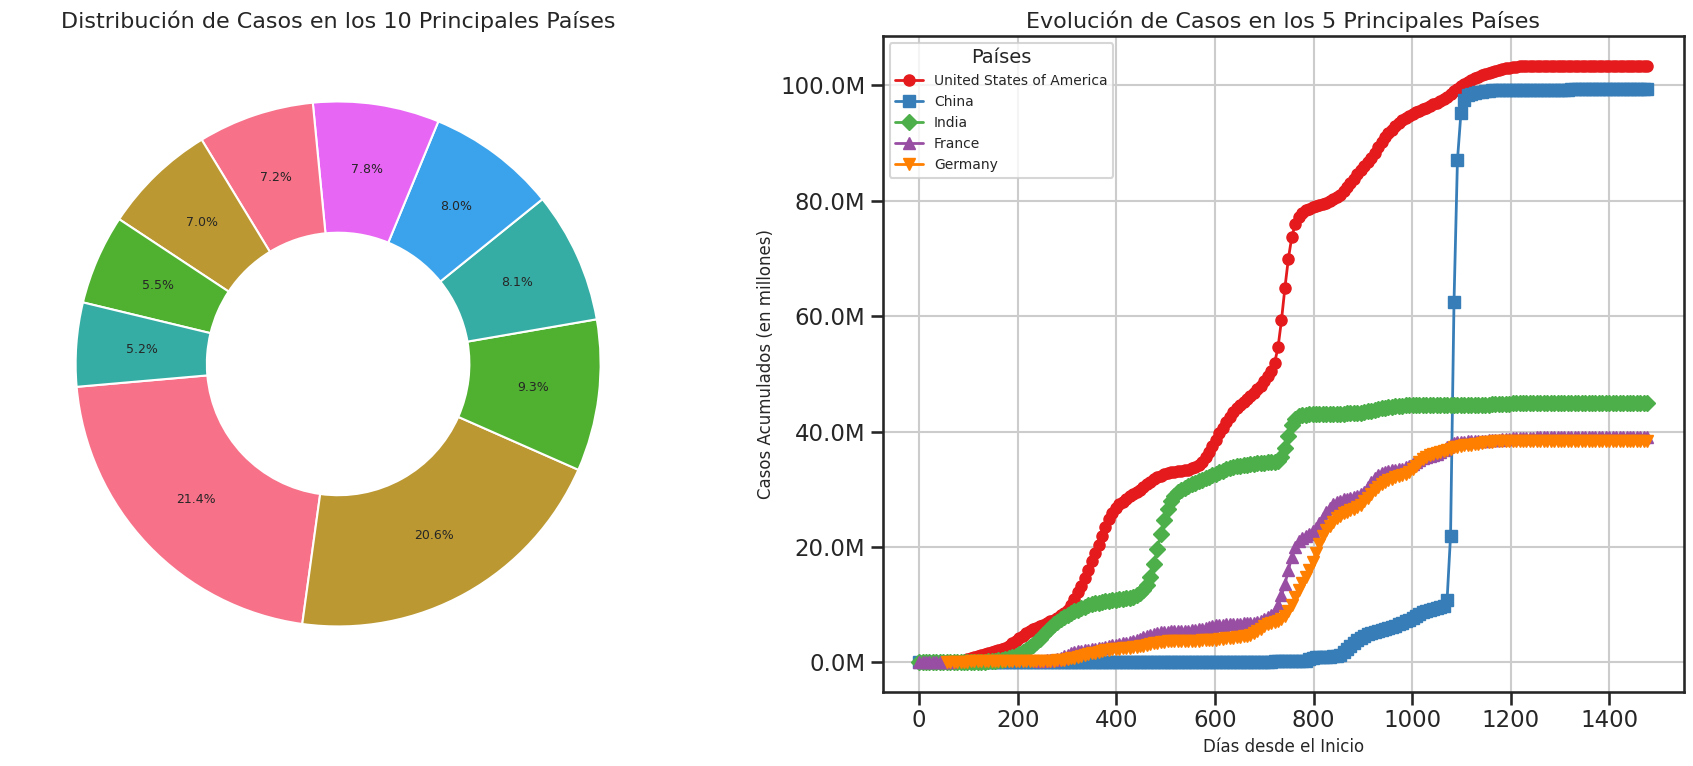

In [ ]:
# Gráfico de Donuts y Líneas mejorado
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de Donuts
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))
axs[0].set_title('Distribución de Casos en los 10 Principales Países', fontsize=16)
legend_donut = axs[1].legend(top_10_paises.index, title="Países", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
legend_donut.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

# Gráfico de Líneas
colors_lines = sns.color_palette('Set1')[0:len(top_5_paises)]
for pais, color, marker in zip(top_5_paises.index, colors_lines, ['o', 's', 'D', '^', 'v']):
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais, color=color, linewidth=2, marker=marker, markersize=8)

axs[1].set_title('Evolución de Casos en los 5 Principales Países', fontsize=16)
axs[1].set_xlabel('Días desde el Inicio', fontsize=12)
axs[1].set_ylabel('Casos Acumulados (en millones)', fontsize=12)
legend_lines = axs[1].legend(title="Países", fontsize=10)
legend_lines.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

axs[1].get_yaxis().set_major_formatter(FuncFormatter(millones_formatter))

# Añadir cuadrícula al gráfico de líneas
axs[1].grid(True)

plt.tight_layout()
plt.show()

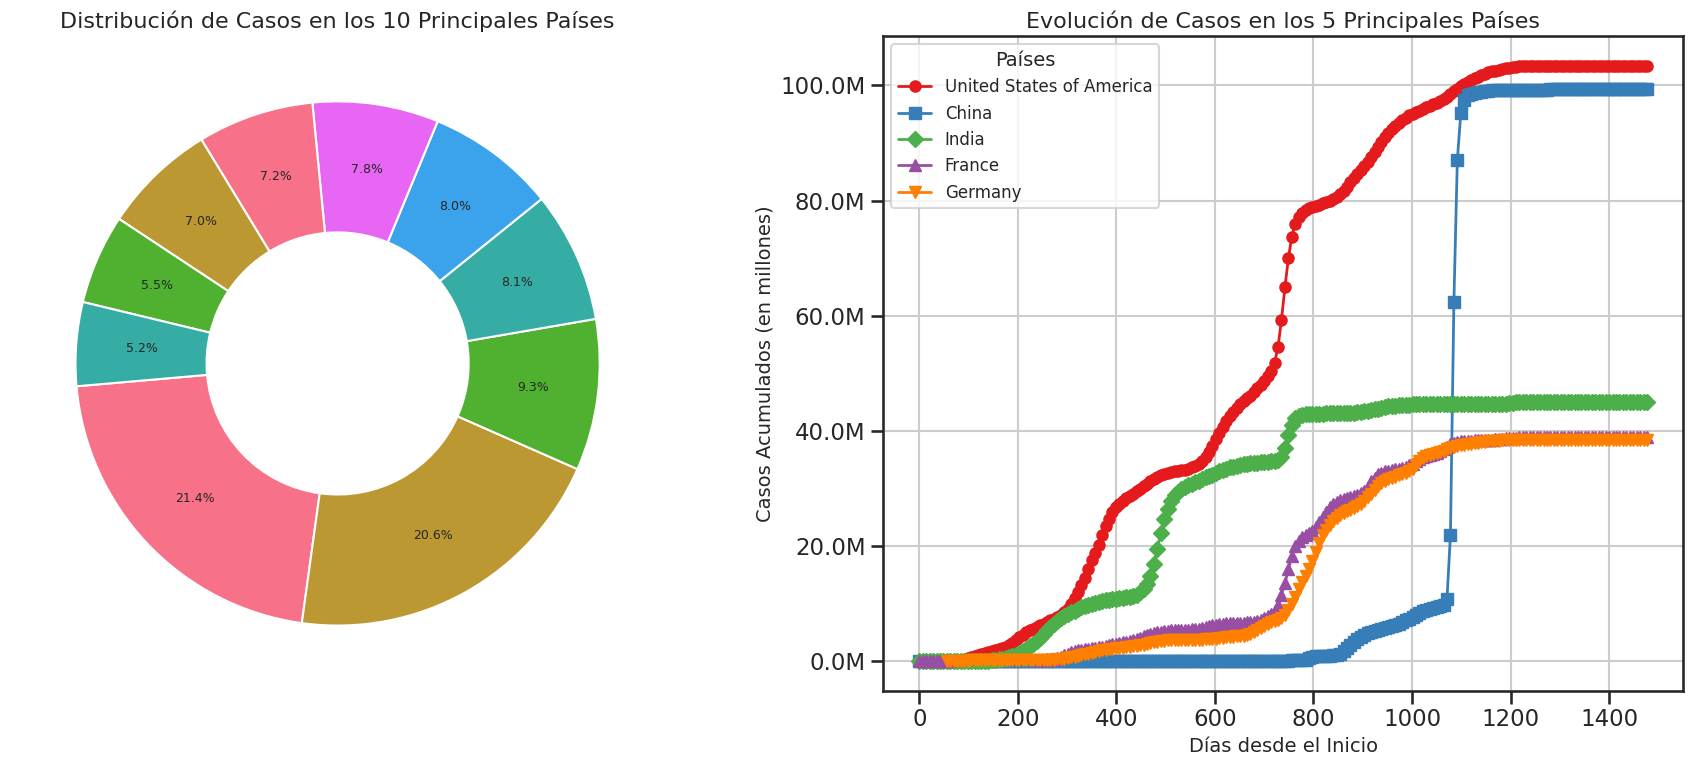

In [ ]:
# Gráfico de Donuts y Líneas mejorado
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de Donuts
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))
axs[0].set_title('Distribución de Casos en los 10 Principales Países', fontsize=16)
legend_donut = axs[1].legend(top_10_paises.index, title="Países", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
legend_donut.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

# Gráfico de Líneas
colors_lines = sns.color_palette('Set1')[0:len(top_5_paises)]
for pais, color, marker in zip(top_5_paises.index, colors_lines, ['o', 's', 'D', '^', 'v']):
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais, color=color, linewidth=2, marker=marker, markersize=8)

axs[1].set_title('Evolución de Casos en los 5 Principales Países', fontsize=16)
axs[1].set_xlabel('Días desde el Inicio', fontsize=14)
axs[1].set_ylabel('Casos Acumulados (en millones)', fontsize=14)
legend_lines = axs[1].legend(title="Países", fontsize=12)
legend_lines.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

axs[1].get_yaxis().set_major_formatter(FuncFormatter(millones_formatter))

# Añadir cuadrícula al gráfico de líneas
axs[1].grid(True)

plt.tight_layout()
plt.show()

